In [71]:

import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10

%matplotlib inline
tf.__version__

'2.3.0'

In [72]:
class_names = ['airplane', 'automobile','bird','cat','deer','dog','frog', 'horse', 'ship', 'truck']

In [73]:
(X_train, y_train),(X_test, y_test) = cifar10.load_data()

In [74]:
X_train = X_train/255.0
X_test = X_test/255.0

In [75]:
X_test.shape

(10000, 32, 32, 3)

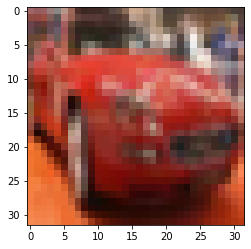

In [76]:
plt.imshow(X_train[5])

In [77]:
model = tf.keras.models.Sequential()

In [78]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='valid', activation='relu',input_shape=[32,32,3]))

In [79]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

In [80]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='valid', activation='relu'))

In [81]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

In [82]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='valid', activation='relu'))

In [83]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

In [84]:
model.add(tf.keras.layers.Flatten())

In [85]:
model.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [86]:
model.add(tf.keras.layers.Dropout(0.2))

In [87]:
model.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [88]:
model.add(tf.keras.layers.Dropout(0.2))

In [89]:
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [90]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 32)          9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 128)              

In [95]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam', metrics = ['sparse_categorical_accuracy'] )

In [96]:
model.fit(X_train,y_train, epochs=20, batch_size=60)

Epoch 1/20
834/834 [==============================] - 3s 3ms/step - loss: 0.7112 - sparse_categorical_accuracy: 0.7499
Epoch 2/20
834/834 [==============================] - 3s 3ms/step - loss: 0.6994 - sparse_categorical_accuracy: 0.7540
Epoch 3/20
834/834 [==============================] - 3s 3ms/step - loss: 0.6865 - sparse_categorical_accuracy: 0.7568
Epoch 4/20
834/834 [==============================] - 3s 3ms/step - loss: 0.6784 - sparse_categorical_accuracy: 0.7618
Epoch 5/20
834/834 [==============================] - 3s 3ms/step - loss: 0.6680 - sparse_categorical_accuracy: 0.7635
Epoch 6/20
834/834 [==============================] - 3s 3ms/step - loss: 0.6647 - sparse_categorical_accuracy: 0.7668
Epoch 7/20
834/834 [==============================] - 3s 3ms/step - loss: 0.6583 - sparse_categorical_accuracy: 0.7672
Epoch 8/20
834/834 [==============================] - 3s 3ms/step - loss: 0.6440 - sparse_categorical_accuracy: 0.7730
Epoch 9/20
834/834 [============================

In [97]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9041 - sparse_categorical_accuracy: 0.7067


In [98]:
print(test_accuracy)

0.7067000269889832
